In [315]:
import pandas as pd
import matplotlib.pyplot as plt
from pathvalidate import sanitize_filename

In [378]:
path = '~/OneDrive - SekII Zürich/Schulleitung/Umfragen/Belastungsstudie MNG/'
file1 = 'BBS1.xlsx'
file2 = 'BBS2.xlsx'
file3 = 'BBS3.xlsx'
file_cols = 'columns.xlsx'

cols = pd.read_excel(path+file_cols)
df1 = pd.read_excel(path+file1)
df2 = pd.read_excel(path+file2)
df34 = pd.read_excel(path+file3)

cols_sel1 = cols[cols['col_include']==1]
cols_sel4 = cols[cols['col_include']==3]
cols_lst1 = cols_sel1['col_ind'].to_list()
cols_lst4 = cols_sel4['col_ind'].to_list()
df1 = df1.iloc[:, cols_lst1]
df2 = df2.iloc[:, cols_lst1]
df3 = df34.iloc[:, cols_lst1]
df4 = df34.iloc[:, cols_lst4]

df = pd.concat([df1, df2, df3])

df.loc[df['Einschätzung_Leistung']=='knapp ', 'Einschätzung_Leistung'] = 'knapp'
df['ha_fächer_we'] = df['ha_fächer_we'].str[:-1].str.split(';')
df['ha_fächer_wt'] = df['ha_fächer_wt'].str[:-1].str.split(';')
df['pv_fächer_we'] = df['pv_fächer_we'].str[:-1].str.split(';')
df['pv_fächer_wt'] = df['pv_fächer_wt'].str[:-1].str.split(';')

time_str2flt = {'0 - 1 Stunde': 0.5, '1 - 2 Stunden': 1.5, '2 - 3 Stunden': 2.5, '3 - 4 Stunden': 3.5, '4 - 5 Stunden': 4.5, 
                '5 - 6 Stunden': 5.5, '6 - 7 Stunden': 6.5, 'mehr': 7.5, }

df['pv_zeit_we_flt'] = df['pv_zeit_we'].map(time_str2flt)
df['ha_zeit_we_flt'] = df['ha_zeit_we'].map(time_str2flt)
df['pv_zeit_wt_flt'] = df['pv_zeit_wt'].map(time_str2flt)
df['ha_zeit_wt_flt'] = df['ha_zeit_wt'].map(time_str2flt)

count_pres_str2flt = {'1-3': 2.0, '4-6': 5.0, '7-9': 8.0, '10 und mehr': 11.0}
freq_nh_str2flt = {'nein': 0.0, 'weniger als einmal pro Woche': 0.5, 'einmal pro Woche': 1.0, 'zweimal pro Woche': 2.0, 
                 'mehr als zweimal pro Woche': 3.0}
count_nh_str2flt = {'Keines': 0.0, '1 Fach': 1.0, '2 Fächer': 2.0, '3 Fächer': 3.0, 'mehr': 4.0}

df4['anz_vorträge_arbeiten_flt'] = df4['anz_vorträge_arbeiten'].map(count_pres_str2flt)
df4['nachhilfe_frequenz_flt'] = df4['nachhilfe_frequenz'].map(freq_nh_str2flt)
df4['nachhilfe_fächer_flt'] = df4['nachhilfe_fächer'].map(count_nh_str2flt)

/var/folders/zd/l7mhvtvd2kl599sl105gvq3h0000gn/T/ipykernel_48345/1327307224.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['anz_vorträge_arbeiten_flt'] = df4['anz_vorträge_arbeiten'].map(count_pres_str2flt)
/var/folders/zd/l7mhvtvd2kl599sl105gvq3h0000gn/T/ipykernel_48345/1327307224.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['nachhilfe_frequenz_flt'] = df4['nachhilfe_frequenz'].map(freq_nh_str2flt)
/var/folders/zd/l7mhvtvd2kl599sl105gvq3h0000gn/T/ipykernel_48345/1327307224.py:50: Sett

In [379]:
df_m = df[df['Geschlecht']=='männlich']
df_w = df[df['Geschlecht']=='weiblich']
df_a = df[df['Geschlecht']=='andere Identität']

df_1 = df[df['Klassenstufe']=='1. Klasse']
df_2 = df[df['Klassenstufe']=='2. Klasse']
df_3 = df[df['Klassenstufe']=='3. Klasse']

df_sg = df[df['Einschätzung_Leistung']=='sehr gut']
df_g = df[df['Einschätzung_Leistung']=='gut']
df_d = df[df['Einschätzung_Leistung']=='durchschnittlich']
df_k = df[df['Einschätzung_Leistung']=='knapp']

df_bc = df[df['Schwerpunktfach']=='Biologie/Chemie']
df_pa = df[df['Schwerpunktfach']=='Physik/Anwendungen der Mathematik']

<AxesSubplot: title={'center': 'Einschätzung der eigenen Leistung'}>

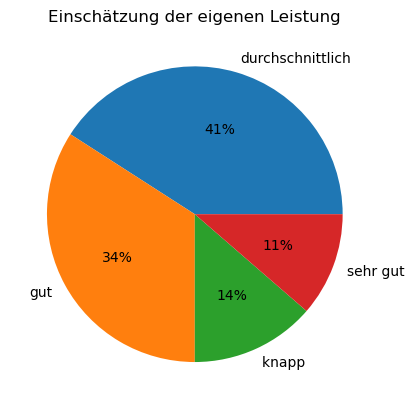

In [198]:
df_1['Einschätzung_Leistung'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Einschätzung der eigenen Leistung', ylabel='')

<AxesSubplot: ylabel='Ziel'>

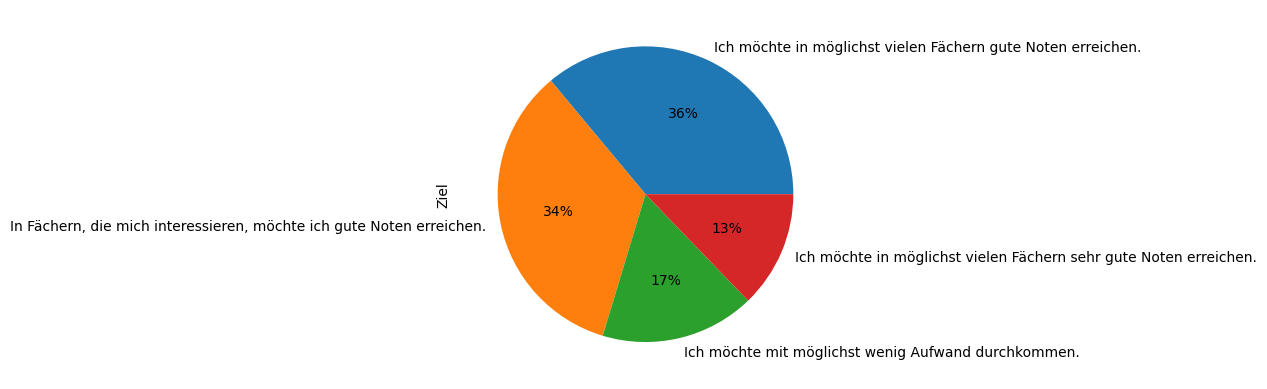

In [90]:
df['Ziel'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [96]:
df.groupby('Klassenstufe').mean()

/var/folders/zd/l7mhvtvd2kl599sl105gvq3h0000gn/T/ipykernel_48345/1627806014.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Klassenstufe').mean()


,zeitl_bel_7d,mental_bel_7d,extern_zeit_7d,extern_mental_7d
Klassenstufe,,,,
1. Klasse,3.484848,3.560606,3.053030,2.439394
2. Klasse,3.743802,3.619835,3.132231,2.347107
3. Klasse,3.818841,3.594203,3.036232,2.224638


In [139]:
df.groupby('Einschätzung_Leistung').count()

,Klassenstufe,Schwerpunktfach,Schulische Herkunft,Geschlecht,Ziel,zeitl_bel_7d,mental_bel_7d,pv_zeit_we,pv_fächer_we,ha_zeit_we,...,nebenjob_we,familie_wt,soziale_kontakte_wt,sport_wt,instrument_wt,social_media_wt,gamen_wt,streamen_wt,andere_hobbies_wt,nebenjob_wt
Einschätzung_Leistung,,,,,,,,,,,,,,,,,,,,,
durchschnittlich,402,117,402,402,402,402,402,402,384,402,...,402,402,402,402,402,402,402,402,402,402
gut,399,138,399,399,399,399,399,399,381,399,...,399,399,399,399,399,399,399,399,399,399
knapp,201,96,201,201,201,201,201,201,189,201,...,201,201,201,201,201,201,201,201,201,201
sehr gut,171,63,171,171,171,171,171,171,156,171,...,171,171,171,171,171,171,171,171,171,171


<AxesSubplot: >

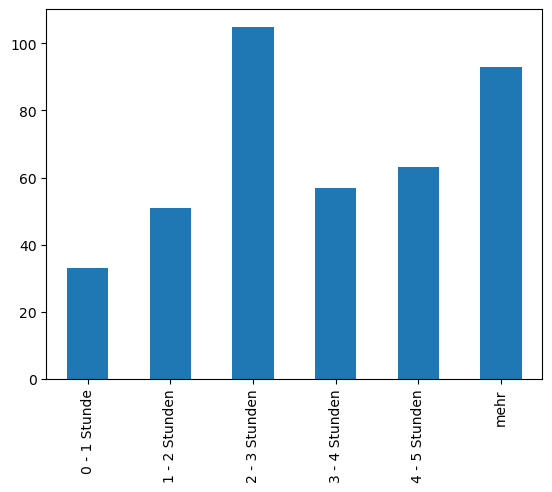

In [145]:
df_d['pv_zeit_we'].value_counts(sort=False).sort_index().plot.bar()

<AxesSubplot: ylabel='pv_zeit_we'>

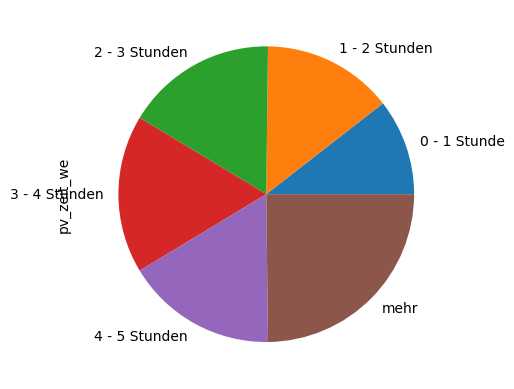

In [151]:
df_g['pv_zeit_we'].value_counts(sort=False).sort_index().plot.pie()

<AxesSubplot: title={'center': 'Title'}, ylabel='Frequency'>

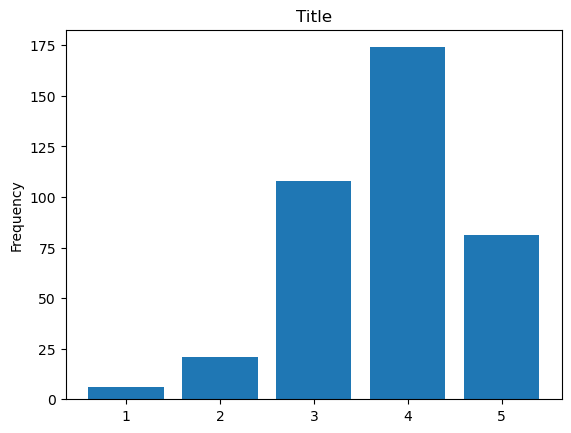

In [181]:
df_w['zeitl_bel_7d'].plot.hist(bins=5, range=(0.5, 5.5), rwidth=0.8, title='Title')

In [147]:
cols_sel1

,col_ind,col_name,col_description,col_include
7,7,Klassenstufe,Klassenstufe,1.0
10,10,Schwerpunktfach,Schwerpunktfach,1.0
13,13,Schulische Herkunft,Schulische Herkunft,1.0
16,16,Geschlecht,Geschlecht,1.0
19,19,Einschätzung_Leistung,Selbsteinschätzung schulische Leistung,1.0
22,22,Ziel,Schulische Ziele,1.0
25,25,zeitl_bel_7d,Zeitliche Belastung durch Schule in letzten si...,1.0
28,28,mental_bel_7d,Mentale Belastung durch Schule in letzten sieb...,1.0
31,31,pv_zeit_we,Prüfungsvorbereitung: Zeitaufwand am Wochenende,1.0
34,34,pv_fächer_we,Prüfungsvorbereitung: Fächer am Wochenende,1.0


In [397]:
# function to plot histograms
def plot_hist(data, bins, suptitle, title, color):
    fig = plt.figure(figsize=(5, 5), dpi=150)
    data.hist(bins=bins, rwidth=0.8, color=color, ax=plt.gca())
    plt.suptitle(suptitle)
    plt.title(title)
    # plt.xticks(range(1,7))
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    plt.close()

# function to plot bar charts
def plot_bar(data, suptitle, title, color, path):
    fig = plt.figure(figsize=(8, 5), dpi=150)
    data.value_counts().sort_index().plot.bar(color=color, ax=plt.gca())
    plt.suptitle(suptitle)
    plt.title(title)
    # plt.xticks(range(1,7))
    plt.grid(False)
    plt.tight_layout()
    plt.savefig(path)
    plt.close()

In [398]:
subjects = {'Bildnerisches Gestalten': 'BG', 'BildnerischesGestalten': 'BG', 'Biologie': 'BG', 'Chemie': 'C', 'Deutsch': 'D', 
            'Englisch': 'E', 'Französisch/Italienisch': 'F/I', 'Geografie': 'Gg', 'Geschichte': 'G', 'Informatik': 'Inf', 
            'Mathematik': 'M', 'Physik': 'P'}

for index, row in cols.iterrows():
    if row['col_include'] == 1.0:
        if row['col_diag'] == 'bar':
            column = row['col_name']
            suptitle = row['col_description']
            path = 'figures/'+sanitize_filename(column)+'.png'
            plot_bar(df[column], suptitle, '', 'red', path)

        if row['col_diag'] == 'bar_exp':
            column = row['col_name']
            dfplot = df.explode(column)
            data = dfplot[column].map(subjects)
            suptitle = row['col_description']
            path = 'figures/'+sanitize_filename(column)+'.png'
            plot_bar(data, suptitle, '', 'red', path)



In [373]:
df['ha_fächer_we'].explode().value_counts()

Deutsch                    437
Englisch                   414
Französisch/Italienisch    320
Mathematik                 225
Geografie                  209
Physik                     196
Biologie                   131
Geschichte                 129
Informatik                  54
Chemie                      52
Musik                       29
Bildnerisches Gestalten     22
Name: ha_fächer_we, dtype: int64

In [394]:
column = 'ha_fächer_we'
dfplot = df.explode(column)
data = dfplot['pv_fächer_we'].map(subjects)

TypeError: unhashable type: 'list'

In [391]:
data

0       BG
0        M
1        M
1       BG
2      NaN
      ... 
318     Gg
318      E
319      C
320    NaN
321      M
Name: pv_fächer_we, Length: 2271, dtype: object